## This notebook reads czi files and converts into tif

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%config InlineBackend.figure_format = 'retina'

import tifffile
import umap # umap-learn
import glob
import os

from imageio import volread as imread
from skimage.filters import threshold_otsu

from skimage import filters

from scipy.fft import fft2, fftshift

In [4]:
# confirm current environment
! echo $CONDA_PREFIX

$CONDA_PREFIX


In [5]:
# GAN conda environment
! python --version

Python 3.8.8


In [8]:
from czifile import CziFile

In [9]:
filename = 'Experiment-1492_Unmixing-Split Scenes-01.czi'
DATA_DIR = './'
with CziFile(f'{DATA_DIR}{filename}') as czi:
    im = czi.asarray()
print(im.shape) # STCZYX

(1, 1, 1, 6, 1, 4716, 4716, 1)


In [10]:
img=im.reshape((6,4716,4716))
img.shape

(6, 4716, 4716)

In [11]:
np.array_equal(im[0,0,0,:,0,:,:,0], img)

True

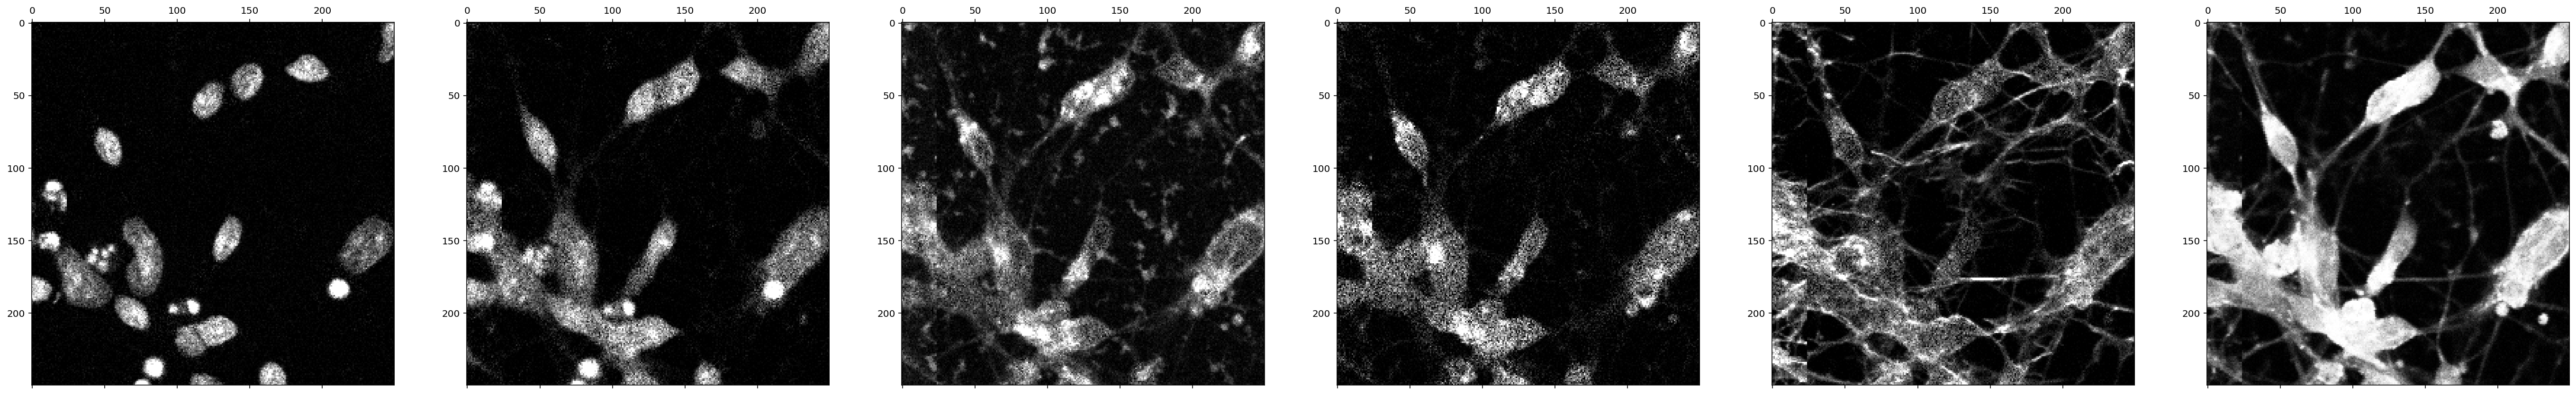

In [12]:
# take a sample image - try using NWS channel
fig, axs = plt.subplots(1,6, figsize=(48,8))
axs=axs.ravel()

## set image
## 

for k in range(im.shape[3]):
    axs[k].matshow(img[k,1000:1250, 1000:1250],  cmap='gray',
                  vmin=np.quantile(img[k,1000:1250, 1000:1250], 0.05), vmax=np.quantile(img[k,1000:1250, 1000:1250], 0.99))

In [13]:
img.dtype

dtype('uint8')

In [14]:
out_file = 'test_01.tif'
im_to_save = img.copy()
im_to_save = im_to_save.astype('float32')
tifffile.imwrite(f'./{out_file}', im_to_save,imagej=True,photometric='minisblack',
                 metadata={'axes': 'CYX'})